In [1]:
import pandas as pd
import numpy as np
import os

C:\Users\benfi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\benfi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Define the file path
file_path = 'C:\\Users\\benfi\\Defensive_Players_NFL\\data\\complete_drafted_df.csv'

# Read the CSV file into a DataFrame
complete_drafted_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
complete_drafted_df

,URL,School,Conf,G,college_solo_tackles,college_assisted_tackle,college_total_tackles,college_tackles_for_loss,college_sk,college_int,...,college_int_yds_avg,college_int_td_avg,college_passes_defended_avg,college_fumbles_recov_avg,college_fumbles_recov_yds_avg,college_fumbles_recov_td_avg,college_fumbles_forced_avg,drafted,position_group,power_5
0,https://www.sports-reference.com/cfb/players/a...,Iowa State,Big 12,24.0,42.0,34.0,76.0,8.0,2.5,0.0,...,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,True,DL,True
1,https://www.sports-reference.com/cfb/players/a...,Iowa State,Big 12,24.0,162.0,92.0,254.0,17.5,3.0,2.0,...,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,LB,True
2,https://www.sports-reference.com/cfb/players/a...,Florida State,ACC,36.0,34.0,41.0,75.0,17.5,5.5,0.0,...,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,True,DL,True
3,https://www.sports-reference.com/cfb/players/a...,Cincinnati,Big East,34.0,43.0,35.0,78.0,17.0,7.0,0.0,...,0.000000,0.000000,0.117647,0.058824,1.088235,0.029412,0.000000,True,LB,False
4,https://www.sports-reference.com/cfb/players/a...,Arizona,Pac-10,46.0,143.0,40.0,183.0,8.5,1.0,15.0,...,7.586957,0.065217,0.000000,0.000000,0.000000,0.000000,0.000000,True,DB,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,https://www.sports-reference.com/cfb/players/t...,UTEP,CUSA,45.0,217.0,174.0,391.0,35.0,8.5,2.0,...,-0.044444,0.000000,0.333333,0.088889,0.444444,0.022222,0.111111,True,LB,False
1956,https://www.sports-reference.com/cfb/players/t...,Florida,SEC,51.0,135.0,79.0,214.0,32.0,9.5,1.0,...,0.294118,0.000000,0.176471,0.000000,0.000000,0.000000,0.039216,True,LB,True
1957,https://www.sports-reference.com/cfb/players/x...,Clemson,ACC,61.0,65.0,56.0,121.0,35.0,17.5,0.0,...,0.000000,0.114754,0.032787,0.327869,0.000000,0.098361,0.000000,True,DL,True
1958,https://www.sports-reference.com/cfb/players/z...,Georgia,SEC,50.0,28.0,24.0,52.0,5.0,1.5,0.0,...,0.000000,0.080000,0.020000,0.000000,0.000000,0.020000,0.000000,True,DL,True


In [3]:
#----------------------------------------

In [4]:

# Exclude 2024 data
dl_df = complete_drafted_df[(complete_drafted_df['position_group'] == 'DL') & (complete_drafted_df['player_year'] < 2024)]
lb_df = complete_drafted_df[(complete_drafted_df['position_group'] == 'LB') & (complete_drafted_df['player_year'] < 2024)]
db_df = complete_drafted_df[(complete_drafted_df['position_group'] == 'DB') & (complete_drafted_df['player_year'] < 2024)]


db_df['years_played'] = db_df['draft_to'] - db_df['player_year']
db_df['years_played'] = db_df['years_played'].replace(0, 1)  # Avoid division by zero
db_df['carav_per_year'] = db_df['draft_carav'] / db_df['years_played']
db_df['carav_per_year'].fillna(0, inplace=True)

C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/3593280802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_df['years_played'] = db_df['draft_to'] - db_df['player_year']
C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/3593280802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_df['years_played'] = db_df['years_played'].replace(0, 1)  # Avoid division by zero
C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/3593280802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [5]:
# Extracting the top 10 draft picks each year for the DL (Defensive Linemen) position group based on `draft_pick`
# Assuming `complete_drafted_df` is already loaded in the environment



In [6]:
#db

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fill NaN in `carav_per_year` with 0
db_df['carav_per_year'].fillna(0, inplace=True)

# Define features and impute missing values for the DB position group
db_features = [ 'combine_weight',
               'college_assisted_tackle_avg', 'college_int_avg', 
               'college_solo_tackles_avg', 'college_total_tackles_avg', 'college_passes_defended',
               'college_fumbles_forced']

# Prepare feature matrix and target vector
X_db = db_df[db_features]
y_db = db_df['carav_per_year']

# Impute any missing values in the features
imputer = IterativeImputer(random_state=42)
X_db_imputed = pd.DataFrame(imputer.fit_transform(X_db), columns=db_features)

# Transform target into categories: low, medium, medium-high, high
y_bins = pd.qcut(y_db, q=4, labels=[1, 2, 3, 4])  # 1: low, 2: medium, 3: medium-high, 4: high
y_bins.fillna(1, inplace=True)  # Fill NaN values with the lowest bin

# Apply SMOTE to balance transformed target categories
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_db_imputed, y_bins)

# Map categorical predictions back to continuous target values
y_resampled_continuous = y_resampled.map({
    1: y_db[y_bins == 1].mean(),
    2: y_db[y_bins == 2].mean(),
    3: y_db[y_bins == 3].mean(),
    4: y_db[y_bins == 4].mean(),
})

# Split data: train on 2008-2020, test on 2021-2023
train_data = db_df[db_df['player_year'] <= 2018]
test_data = db_df[(db_df['player_year'] >= 2019) & (db_df['player_year'] <= 2023)]

X_db_train, y_db_train = train_data[db_features], train_data['carav_per_year']
X_db_test, y_db_test = test_data[db_features], test_data['carav_per_year']

# Train the XGBRegressor model on the resampled data
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled_continuous)

# Make predictions on the 2021-2023 test set
y_db_pred = xgb_model.predict(X_db_test)

# Add predictions to the test data for analysis
test_data = test_data.copy()
test_data['predicted_carav_per_year'] = y_db_pred

# Collect top 10 players each year for model and scouts
model_top_10_combined = []
scout_top_10_combined = []
common_top_10_combined = []

for year in [2019, 2020, 2021, 2022, 2023]:
    year_data = test_data[test_data['player_year'] == year]
    
    model_top_10 = year_data.sort_values(by='predicted_carav_per_year', ascending=False).head(10)
    scout_top_10 = year_data.sort_values(by='draft_pick').head(10)
    
    model_top_10 = model_top_10[['player_name', 'player_year', 'predicted_carav_per_year', 'carav_per_year']]
    scout_top_10 = scout_top_10[['player_name', 'player_year', 'carav_per_year']]
    
    common_top_10 = pd.merge(model_top_10, scout_top_10, on='player_name', suffixes=('_model', '_scout'))
    
    model_top_10_combined.append(model_top_10)
    scout_top_10_combined.append(scout_top_10)
    common_top_10_combined.append(common_top_10)

# Combine and calculate averages using actual carav_per_year values
model_top_10_all = pd.concat(model_top_10_combined)
scout_top_10_all = pd.concat(scout_top_10_combined)
common_top_10_all = pd.concat(common_top_10_combined)

model_avg_carav_per_year_all = model_top_10_all['carav_per_year'].mean()  # Using actual carav_per_year
scout_avg_carav_per_year_all = scout_top_10_all['carav_per_year'].mean()
common_avg_carav_per_year_all = common_top_10_all['carav_per_year_model'].mean()  # Using actual carav_per_year

# Display results and conduct t-test
print(f"\nMean carav_per_year for Model's Combined Top 10 Predicted Players per year (2019-2023): {model_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Scouts' Combined Top 10 Selected Players per year (2019-2023): {scout_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2019-2023): {common_avg_carav_per_year_all:.4f}")

scout_carav_values = scout_top_10_all['carav_per_year'].dropna()
common_carav_values = common_top_10_all['carav_per_year_model'].dropna()

t_stat, p_value = ttest_ind(scout_carav_values, common_carav_values, equal_var=False)
mean_diff = common_carav_values.mean() - scout_carav_values.mean()
pooled_std = np.sqrt((common_carav_values.var(ddof=1) / len(common_carav_values)) +
                     (scout_carav_values.var(ddof=1) / len(scout_carav_values)))
ci_lower = mean_diff - 1.96 * pooled_std
ci_upper = mean_diff + 1.96 * pooled_std

print(f"\nTwo-Sample T-Test for carav_per_year between Scouts' and Common Top Players:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nMean Difference in carav_per_year: {mean_diff:.4f}")
print(f"95% Confidence Interval for the Difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
if p_value < 0.05:
    print("The difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players is statistically significant (p < 0.05).")
else:
    print("There is no statistically significant difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players.")

    
    
scout_carav_values = scout_top_10_all['carav_per_year'].dropna()
model_carav_values = model_top_10_all['carav_per_year'].dropna()


t_stat, p_value = ttest_ind(scout_carav_values, model_carav_values, equal_var=False)
mean_diff = model_carav_values.mean() - scout_carav_values.mean()
pooled_std = np.sqrt((model_carav_values.var(ddof=1) / len(model_carav_values)) +
                     (scout_carav_values.var(ddof=1) / len(scout_carav_values)))
ci_lower = mean_diff - 1.96 * pooled_std
ci_upper = mean_diff + 1.96 * pooled_std


print(f"\nTwo-Sample T-Test for carav_per_year between Scouts' and Model Top Players:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nMean Difference in carav_per_year: {mean_diff:.4f}")
print(f"95% Confidence Interval for the Difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
if p_value < 0.05:
    print("The difference in carav_per_year between the scout top 10 and the model top 10 players is statistically significant (p < 0.05).")
else:
    print("There is no statistically significant difference in carav_per_year between the scout top 10 and the model players.")
     
    
# Display the combined top 30 model-predicted players for 2021-2023 with actual carav_per_year values
print("\nTop 10 Predicted Players by Model per year (2019-2023):")
print(model_top_10_all.sort_values(by=['player_year', 'carav_per_year'], ascending=[True, False]).to_string(index=False))

# Display the combined top 30 scout-selected players for 2021-2023 with actual carav_per_year values
print("\nTop 10 Players Selected by Scouts per year (2019-2023):")
print(scout_top_10_all.sort_values(by=['player_year', 'carav_per_year'], ascending=[True, False]).to_string(index=False))

# Display the combined common top 30 players between model and scouts for 2021-2023 with actual carav_per_year values
print("\nCombined Common Top 10 Players in Both Model and Scout Selections per year (2019-2023):")
print(common_top_10_all.sort_values(by=['player_year_model', 'carav_per_year_model'], ascending=[True, False]).to_string(index=False))

# Display means for each group for comparison
model_avg_carav_per_year_all = model_top_10_all['carav_per_year'].mean()
scout_avg_carav_per_year_all = scout_top_10_all['carav_per_year'].mean()
common_avg_carav_per_year_all = common_top_10_all['carav_per_year_model'].mean()

print(f"\nMean carav_per_year for Model's Top 10 Predicted Players per year (2019-2023): {model_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Scouts'Top 10 Selected Players per year (2019-2023): {scout_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2019-2023): {common_avg_carav_per_year_all:.4f}")



# Evaluate regression performance metrics
mae = mean_absolute_error(y_db_test, y_db_pred)
rmse = np.sqrt(mean_squared_error(y_db_test, y_db_pred))
r2 = r2_score(y_db_test, y_db_pred)

# Print the regression performance metrics
print("\nRegression Performance Metrics for Test Set (2019-2023):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")



joblib.dump(xgb_model, 'xgb_db_model.pkl')

C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/408189964.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_df['carav_per_year'].fillna(0, inplace=True)



Mean carav_per_year for Model's Combined Top 10 Predicted Players per year (2019-2023): 6.7517
Mean carav_per_year for Scouts' Combined Top 10 Selected Players per year (2019-2023): 5.7583
Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2019-2023): 8.3220

Two-Sample T-Test for carav_per_year between Scouts' and Common Top Players:
T-statistic: -2.0694
P-value: 0.0450

Mean Difference in carav_per_year: 2.5636
95% Confidence Interval for the Difference: [0.1355, 4.9918]
The difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players is statistically significant (p < 0.05).

Two-Sample T-Test for carav_per_year between Scouts' and Model Top Players:
T-statistic: -1.0668
P-value: 0.2887

Mean Difference in carav_per_year: 0.9933
95% Confidence Interval for the Difference: [-0.8317, 2.8183]
There is no statistically significant difference in carav_per_year between the scout top 10 and the model players.

T

['xgb_db_model.pkl']

In [8]:
#without smote

In [9]:
# import pandas as pd
# import numpy as np
# from xgboost import XGBRegressor
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from scipy.stats import ttest_ind
# import joblib
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Fill NaN in `carav_per_year` with 0
# db_df['carav_per_year'].fillna(0, inplace=True)

# # Define features and impute missing values for the DB position group
# db_features = [ 'combine_weight',
#                'college_assisted_tackle_avg', 'college_int_avg', 
#                'college_solo_tackles_avg', 'college_total_tackles_avg', 'college_passes_defended',
#                'college_fumbles_forced']

# # Prepare feature matrix and target vector
# X_db = db_df[db_features]
# y_db = db_df['carav_per_year']

# # Impute any missing values in the features
# imputer = IterativeImputer(random_state=42)
# X_db_imputed = pd.DataFrame(imputer.fit_transform(X_db), columns=db_features)

# # Transform target into categories: low, medium, medium-high, high
# y_bins = pd.qcut(y_db, q=4, labels=[1, 2, 3, 4])  # 1: low, 2: medium, 3: medium-high, 4: high
# y_bins.fillna(1, inplace=True)  # Fill NaN values with the lowest bin

# # Map categorical bins back to continuous target values without using SMOTE
# y_mapped_continuous = y_bins.map({
#     1: y_db[y_bins == 1].mean(),
#     2: y_db[y_bins == 2].mean(),
#     3: y_db[y_bins == 3].mean(),
#     4: y_db[y_bins == 4].mean(),
# })

# # Split data: train on 2008-2020, test on 2021-2023
# train_data = db_df[db_df['player_year'] <= 2018]
# test_data = db_df[(db_df['player_year'] >= 2019) & (db_df['player_year'] <= 2023)]

# X_db_train, y_db_train = train_data[db_features], train_data['carav_per_year']
# X_db_test, y_db_test = test_data[db_features], test_data['carav_per_year']

# # Train the XGBRegressor model without resampled data
# xgb_model = XGBRegressor(
#     n_estimators=200,
#     max_depth=6,
#     learning_rate=0.1,
#     objective='reg:squarederror',
#     random_state=42
# )
# xgb_model.fit(X_db_train, y_db_train)

# # Make predictions on the 2021-2023 test set
# y_db_pred = xgb_model.predict(X_db_test)

# # Add predictions to the test data for analysis
# test_data = test_data.copy()
# test_data['predicted_carav_per_year'] = y_db_pred

# # Evaluate regression performance metrics
# mae = mean_absolute_error(y_db_test, y_db_pred)
# rmse = np.sqrt(mean_squared_error(y_db_test, y_db_pred))
# r2 = r2_score(y_db_test, y_db_pred)

# # Print the regression performance metrics
# print("\nRegression Performance Metrics for Test Set (2019-2023) Without SMOTE:")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R-squared (R2): {r2:.4f}")

# # Collect top 10 players each year for model and scouts
# model_top_10_combined = []
# scout_top_10_combined = []
# common_top_10_combined = []

# for year in [2019, 2020, 2021, 2022, 2023]:
#     year_data = test_data[test_data['player_year'] == year]
    
#     model_top_10 = year_data.sort_values(by='predicted_carav_per_year', ascending=False).head(10)
#     scout_top_10 = year_data.sort_values(by='draft_pick').head(10)
    
#     model_top_10 = model_top_10[['player_name', 'player_year', 'predicted_carav_per_year', 'carav_per_year']]
#     scout_top_10 = scout_top_10[['player_name', 'player_year', 'carav_per_year']]
    
#     common_top_10 = pd.merge(model_top_10, scout_top_10, on='player_name', suffixes=('_model', '_scout'))
    
#     model_top_10_combined.append(model_top_10)
#     scout_top_10_combined.append(scout_top_10)
#     common_top_10_combined.append(common_top_10)

# # Combine and calculate averages using actual carav_per_year values
# model_top_10_all = pd.concat(model_top_10_combined)
# scout_top_10_all = pd.concat(scout_top_10_combined)
# common_top_10_all = pd.concat(common_top_10_combined)

# model_avg_carav_per_year_all = model_top_10_all['carav_per_year'].mean()  # Using actual carav_per_year
# scout_avg_carav_per_year_all = scout_top_10_all['carav_per_year'].mean()
# common_avg_carav_per_year_all = common_top_10_all['carav_per_year_model'].mean()  # Using actual carav_per_year

# # Display results and conduct t-test
# print(f"\nMean carav_per_year for Model's Combined Top 10 Predicted Players per year (2019-2023): {model_avg_carav_per_year_all:.4f}")
# print(f"Mean carav_per_year for Scouts' Combined Top 10 Selected Players per year (2019-2023): {scout_avg_carav_per_year_all:.4f}")
# print(f"Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2019-2023): {common_avg_carav_per_year_all:.4f}")




In [10]:
#randomforest

In [11]:
# import pandas as pd
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from scipy.stats import ttest_ind
# import joblib

# # Fill NaN in `carav_per_year` with 0
# db_df['carav_per_year'].fillna(0, inplace=True)

# # Define features and impute missing values for the DB position group
# db_features = [ 'combine_weight',
#                'college_assisted_tackle_avg', 'college_int_avg', 
#                'college_solo_tackles_avg', 'college_total_tackles_avg', 'college_passes_defended',
#                'college_fumbles_forced']

# # Prepare feature matrix and target vector
# X_db = db_df[db_features]
# y_db = db_df['carav_per_year']

# # Impute any missing values in the features
# imputer = IterativeImputer(random_state=42)
# X_db_imputed = pd.DataFrame(imputer.fit_transform(X_db), columns=db_features)

# # Transform target into categories: low, medium, medium-high, high
# y_bins = pd.qcut(y_db, q=4, labels=[1, 2, 3, 4])  # 1: low, 2: medium, 3: medium-high, 4: high
# y_bins.fillna(1, inplace=True)  # Fill NaN values with the lowest bin

# # Apply SMOTE to balance transformed target categories
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_db_imputed, y_bins)

# # Map categorical predictions back to continuous target values
# y_resampled_continuous = y_resampled.map({
#     1: y_db[y_bins == 1].mean(),
#     2: y_db[y_bins == 2].mean(),
#     3: y_db[y_bins == 3].mean(),
#     4: y_db[y_bins == 4].mean(),
# })

# # Split data: train on 2008-2020, test on 2021-2023
# train_data = db_df[db_df['player_year'] <= 2018]
# test_data = db_df[(db_df['player_year'] >= 2019) & (db_df['player_year'] <= 2023)]

# X_db_train, y_db_train = train_data[db_features], train_data['carav_per_year']
# X_db_test, y_db_test = test_data[db_features], test_data['carav_per_year']

# # Train the RandomForestRegressor model on the resampled data
# rf_model = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=10,
#     random_state=42
# )
# rf_model.fit(X_resampled, y_resampled_continuous)

# # Make predictions on the 2021-2023 test set
# y_db_pred = rf_model.predict(X_db_test)

# # Add predictions to the test data for analysis
# test_data = test_data.copy()
# test_data['predicted_carav_per_year'] = y_db_pred

# # Collect top 10 players each year for model and scouts
# model_top_10_combined = []
# scout_top_10_combined = []
# common_top_10_combined = []

# for year in [2019, 2020, 2021, 2022, 2023]:
#     year_data = test_data[test_data['player_year'] == year]
    
#     model_top_10 = year_data.sort_values(by='predicted_carav_per_year', ascending=False).head(10)
#     scout_top_10 = year_data.sort_values(by='draft_pick').head(10)
    
#     model_top_10 = model_top_10[['player_name', 'player_year', 'predicted_carav_per_year', 'carav_per_year']]
#     scout_top_10 = scout_top_10[['player_name', 'player_year', 'carav_per_year']]
    
#     common_top_10 = pd.merge(model_top_10, scout_top_10, on='player_name', suffixes=('_model', '_scout'))
    
#     model_top_10_combined.append(model_top_10)
#     scout_top_10_combined.append(scout_top_10)
#     common_top_10_combined.append(common_top_10)

# # Combine and calculate averages using actual carav_per_year values
# model_top_10_all = pd.concat(model_top_10_combined)
# scout_top_10_all = pd.concat(scout_top_10_combined)
# common_top_10_all = pd.concat(common_top_10_combined)

# model_avg_carav_per_year_all = model_top_10_all['carav_per_year'].mean()  # Using actual carav_per_year
# scout_avg_carav_per_year_all = scout_top_10_all['carav_per_year'].mean()
# common_avg_carav_per_year_all = common_top_10_all['carav_per_year_model'].mean()  # Using actual carav_per_year

# # Display results and conduct t-test
# print(f"\nMean carav_per_year for Model's Combined Top 10 Predicted Players per year (2019-2023): {model_avg_carav_per_year_all:.4f}")
# print(f"Mean carav_per_year for Scouts' Combined Top 10 Selected Players per year (2019-2023): {scout_avg_carav_per_year_all:.4f}")
# print(f"Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2019-2023): {common_avg_carav_per_year_all:.4f}")

# scout_carav_values = scout_top_10_all['carav_per_year'].dropna()
# common_carav_values = common_top_10_all['carav_per_year_model'].dropna()

# t_stat, p_value = ttest_ind(scout_carav_values, common_carav_values, equal_var=False)
# mean_diff = common_carav_values.mean() - scout_carav_values.mean()
# pooled_std = np.sqrt((common_carav_values.var(ddof=1) / len(common_carav_values)) +
#                      (scout_carav_values.var(ddof=1) / len(scout_carav_values)))
# ci_lower = mean_diff - 1.96 * pooled_std
# ci_upper = mean_diff + 1.96 * pooled_std

# print(f"\nTwo-Sample T-Test for carav_per_year between Scouts' and Common Top Players:")
# print(f"T-statistic: {t_stat:.4f}")
# print(f"P-value: {p_value:.4f}")
# print(f"\nMean Difference in carav_per_year: {mean_diff:.4f}")
# print(f"95% Confidence Interval for the Difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
# if p_value < 0.05:
#     print("The difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players is statistically significant (p < 0.05).")
# else:
#     print("There is no statistically significant difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players.")

# # Evaluate regression performance metrics
# mae = mean_absolute_error(y_db_test, y_db_pred)
# rmse = np.sqrt(mean_squared_error(y_db_test, y_db_pred))
# r2 = r2_score(y_db_test, y_db_pred)

# # Print the regression performance metrics
# print("\nRegression Performance Metrics for Test Set (2019-2023):")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R-squared (R2): {r2:.4f}")



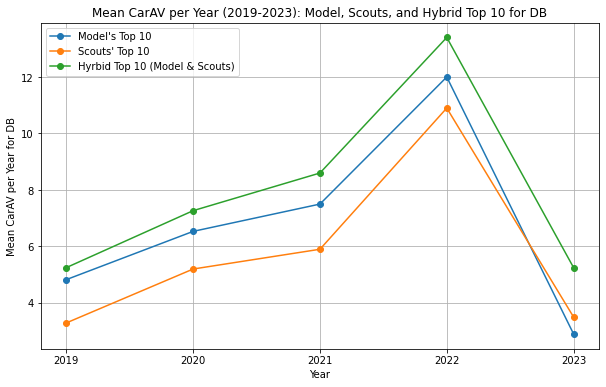

Line chart saved to pic/line_chart_carav_per_year_comparison_db.png


In [12]:
import matplotlib.pyplot as plt

# Create line chart data for LB
years = [2019, 2020, 2021, 2022, 2023]

model_means = [model_top_10_combined[i]['carav_per_year'].mean() for i in range(len(years))]
scout_means = [scout_top_10_combined[i]['carav_per_year'].mean() for i in range(len(years))]
common_means = [common_top_10_combined[i]['carav_per_year_model'].mean() for i in range(len(years))]

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, model_means, marker='o', label="Model's Top 10")
plt.plot(years, scout_means, marker='o', label="Scouts' Top 10")
plt.plot(years, common_means, marker='o', label="Hyrbid Top 10 (Model & Scouts)")

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Mean CarAV per Year for DB")
plt.title("Mean CarAV per Year (2019-2023): Model, Scouts, and Hybrid Top 10 for DB")
plt.legend()
plt.grid()

# Set x-axis ticks to integers only
plt.xticks(years)

# Save the plot to the "pic" folder
output_path = "pic/line_chart_carav_per_year_comparison_db.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()
print(f"Line chart saved to {output_path}")


C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/3512756841.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="CarAV per Year", data=boxplot_df_db, palette="Set2")


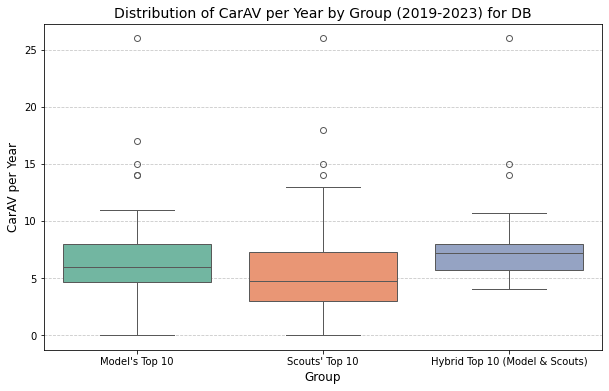

Box plot saved to pic/boxplot_carav_per_year_by_group_db.png


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for the box plot for DB
boxplot_data_db = {
    "Group": ["Model's Top 10"] * len(model_top_10_all['carav_per_year']) +
             ["Scouts' Top 10"] * len(scout_top_10_all['carav_per_year']) +
             ["Hybrid Top 10 (Model & Scouts)"] * len(common_top_10_all['carav_per_year_model']),
    "CarAV per Year": pd.concat([model_top_10_all['carav_per_year'],
                                  scout_top_10_all['carav_per_year'],
                                  common_top_10_all['carav_per_year_model']])
}

boxplot_df_db = pd.DataFrame(boxplot_data_db)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="CarAV per Year", data=boxplot_df_db, palette="Set2")

# Add title and labels
plt.title("Distribution of CarAV per Year by Group (2019-2023) for DB", fontsize=14)
plt.xlabel("Group", fontsize=12)
plt.ylabel("CarAV per Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot to the "pic" folder
output_path = "pic/boxplot_carav_per_year_by_group_db.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()
print(f"Box plot saved to {output_path}")


In [14]:
common_top_10_all = common_top_10_all.rename(columns={
    'player_year_model': 'player_year',
    'carav_per_year_model': 'carav_per_year'
})

In [15]:
# Saving the Model's Top 10 Predicted Players per year (2019-2023) for DB
model_top_10_all.to_csv('model_top_10_db_2019_2023.csv', index=False)

# Saving the Scouts' Top 10 Selected Players per year (2019-2023) for DB
scout_top_10_all.to_csv('scout_top_10_db_2019_2023.csv', index=False)

# Saving the Combined Common Top 10 Players in Both Model and Scout Selections per year (2019-2023) for DB
common_top_10_all.to_csv('common_top_10_db_2019_2023.csv', index=False)


In [16]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import joblib

# Fill NaN in `carav_per_year` with 0
db_df['carav_per_year'].fillna(0, inplace=True)

# Define features and impute missing values for the DB position group
db_features = [ 'combine_weight',
               'college_assisted_tackle_avg', 'college_int_avg', 
               'college_solo_tackles_avg', 'college_total_tackles_avg', 'college_passes_defended',
               'college_fumbles_forced']

# Prepare feature matrix and target vector
X_db = db_df[db_features]
y_db = db_df['carav_per_year']

# Impute any missing values in the features
imputer = IterativeImputer(random_state=42)
X_db_imputed = pd.DataFrame(imputer.fit_transform(X_db), columns=db_features)

# Transform target into categories: low, medium, medium-high, high
y_bins = pd.qcut(y_db, q=4, labels=[1, 2, 3, 4])  # 1: low, 2: medium, 3: medium-high, 4: high
y_bins.fillna(1, inplace=True)  # Fill NaN values with the lowest bin

# Apply SMOTE to balance transformed target categories
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_db_imputed, y_bins)

# Map categorical predictions back to continuous target values
y_resampled_continuous = y_resampled.map({
    1: y_db[y_bins == 1].mean(),
    2: y_db[y_bins == 2].mean(),
    3: y_db[y_bins == 3].mean(),
    4: y_db[y_bins == 4].mean(),
})

# Split data: train on 2013-2023, test on 2008-2012
train_data = db_df[db_df['player_year'] >= 2013]
test_data = db_df[(db_df['player_year'] >= 2008) & (db_df['player_year'] <= 2012)]

X_db_train, y_db_train = train_data[db_features], train_data['carav_per_year']
X_db_test, y_db_test = test_data[db_features], test_data['carav_per_year']

# Train the XGBRegressor model on the resampled data
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled_continuous)

# Make predictions on the 2008-2012 test set
y_db_pred = xgb_model.predict(X_db_test)

# Add predictions to the test data for analysis
test_data = test_data.copy()
test_data['predicted_carav_per_year'] = y_db_pred

# Collect top 10 players each year for model and scouts
model_top_10_combined = []
scout_top_10_combined = []
common_top_10_combined = []

for year in [2008, 2009, 2010, 2011, 2012]:
    year_data = test_data[test_data['player_year'] == year]
    
    model_top_10 = year_data.sort_values(by='predicted_carav_per_year', ascending=False).head(10)
    scout_top_10 = year_data.sort_values(by='draft_pick').head(10)
    
    model_top_10 = model_top_10[['player_name', 'player_year', 'predicted_carav_per_year', 'carav_per_year']]
    scout_top_10 = scout_top_10[['player_name', 'player_year', 'carav_per_year']]
    
    common_top_10 = pd.merge(model_top_10, scout_top_10, on='player_name', suffixes=('_model', '_scout'))
    
    model_top_10_combined.append(model_top_10)
    scout_top_10_combined.append(scout_top_10)
    common_top_10_combined.append(common_top_10)

# Combine and calculate averages using actual carav_per_year values
model_top_10_all = pd.concat(model_top_10_combined)
scout_top_10_all = pd.concat(scout_top_10_combined)
common_top_10_all = pd.concat(common_top_10_combined)

model_avg_carav_per_year_all = model_top_10_all['carav_per_year'].mean()  # Using actual carav_per_year
scout_avg_carav_per_year_all = scout_top_10_all['carav_per_year'].mean()
common_avg_carav_per_year_all = common_top_10_all['carav_per_year_model'].mean()  # Using actual carav_per_year

# Display results and conduct t-test
print(f"\nMean carav_per_year for Model's Combined Top 10 Predicted Players per year (2008-2012): {model_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Scouts' Combined Top 10 Selected Players per year (2008-2012): {scout_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2008-2012): {common_avg_carav_per_year_all:.4f}")

scout_carav_values = scout_top_10_all['carav_per_year'].dropna()
common_carav_values = common_top_10_all['carav_per_year_model'].dropna()

t_stat, p_value = ttest_ind(scout_carav_values, common_carav_values, equal_var=False)
mean_diff = common_carav_values.mean() - scout_carav_values.mean()
pooled_std = np.sqrt((common_carav_values.var(ddof=1) / len(common_carav_values)) +
                     (scout_carav_values.var(ddof=1) / len(scout_carav_values)))
ci_lower = mean_diff - 1.96 * pooled_std
ci_upper = mean_diff + 1.96 * pooled_std

print(f"\nTwo-Sample T-Test for carav_per_year between Scouts' and Common Top Players:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nMean Difference in carav_per_year: {mean_diff:.4f}")
print(f"95% Confidence Interval for the Difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
if p_value < 0.05:
    print("The difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players is statistically significant (p < 0.05).")
else:
    print("There is no statistically significant difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players.")

    
    
scout_carav_values = scout_top_10_all['carav_per_year'].dropna()
model_carav_values = model_top_10_all['carav_per_year'].dropna()


t_stat, p_value = ttest_ind(scout_carav_values, model_carav_values, equal_var=False)
mean_diff = model_carav_values.mean() - scout_carav_values.mean()
pooled_std = np.sqrt((model_carav_values.var(ddof=1) / len(model_carav_values)) +
                     (scout_carav_values.var(ddof=1) / len(scout_carav_values)))
ci_lower = mean_diff - 1.96 * pooled_std
ci_upper = mean_diff + 1.96 * pooled_std


print(f"\nTwo-Sample T-Test for carav_per_year between Scouts' and Model Top Players:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nMean Difference in carav_per_year: {mean_diff:.4f}")
print(f"95% Confidence Interval for the Difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
if p_value < 0.05:
    print("The difference in carav_per_year between the scout top 10 and the model top 10 players is statistically significant (p < 0.05).")
else:
    print("There is no statistically significant difference in carav_per_year between the scout top 10 and the model players.")
     
    
# Display the combined top 30 model-predicted players for 2008-2012 with actual carav_per_year values
print("\nTop 10 Predicted Players by Model per year (2008-2012):")
print(model_top_10_all.sort_values(by=['player_year', 'carav_per_year'], ascending=[True, False]).to_string(index=False))

# Display the combined top 30 scout-selected players for 2008-2012 with actual carav_per_year values
print("\nTop 10 Players Selected by Scouts per year (2008-2012):")
print(scout_top_10_all.sort_values(by=['player_year', 'carav_per_year'], ascending=[True, False]).to_string(index=False))

# Display the combined common top 30 players between model and scouts for 2008-2012 with actual carav_per_year values
print("\nCombined Common Top 10 Players in Both Model and Scout Selections per year (2008-2012):")
print(common_top_10_all.sort_values(by=['player_year_model', 'carav_per_year_model'], ascending=[True, False]).to_string(index=False))

# Display means for each group for comparison
model_avg_carav_per_year_all = model_top_10_all['carav_per_year'].mean()
scout_avg_carav_per_year_all = scout_top_10_all['carav_per_year'].mean()
common_avg_carav_per_year_all = common_top_10_all['carav_per_year_model'].mean()

print(f"\nMean carav_per_year for Model's Top 10 Predicted Players per year (2008-2012): {model_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Scouts' Top 10 Selected Players per year (2008-2012): {scout_avg_carav_per_year_all:.4f}")
print(f"Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2008-2012): {common_avg_carav_per_year_all:.4f}")



C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/1663509458.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_df['carav_per_year'].fillna(0, inplace=True)



Mean carav_per_year for Model's Combined Top 10 Predicted Players per year (2008-2012): 4.3208
Mean carav_per_year for Scouts' Combined Top 10 Selected Players per year (2008-2012): 3.9645
Mean carav_per_year for Common Top 10 Players in Both Model and Scout Selections per year (2008-2012): 5.5484

Two-Sample T-Test for carav_per_year between Scouts' and Common Top Players:
T-statistic: -3.7866
P-value: 0.0004

Mean Difference in carav_per_year: 1.5839
95% Confidence Interval for the Difference: [0.7640, 2.4037]
The difference in carav_per_year between the scout top 10 and the common top 10 (model & scout) players is statistically significant (p < 0.05).

Two-Sample T-Test for carav_per_year between Scouts' and Model Top Players:
T-statistic: -0.8061
P-value: 0.4222

Mean Difference in carav_per_year: 0.3562
95% Confidence Interval for the Difference: [-0.5099, 1.2224]
There is no statistically significant difference in carav_per_year between the scout top 10 and the model players.

T

In [17]:
#2024 models

In [18]:
# Filter out data for 2024 only for each position group
dl_2024_df = complete_drafted_df[(complete_drafted_df['position_group'] == 'DL') & (complete_drafted_df['player_year'] == 2024)]
lb_2024_df = complete_drafted_df[(complete_drafted_df['position_group'] == 'LB') & (complete_drafted_df['player_year'] == 2024)]
db_2024_df = complete_drafted_df[(complete_drafted_df['position_group'] == 'DB') & (complete_drafted_df['player_year'] == 2024)]

# Display the first few rows of each to verify data
print("DL 2024 Data")
print(dl_2024_df.head())
print("\nLB 2024 Data")
print(lb_2024_df.head())
print("\nDB 2024 Data")
print(db_2024_df.head())


DL 2024 Data
                                                    URL            School  \
1847  https://www.sports-reference.com/cfb/players/a...        Penn State   
1849  https://www.sports-reference.com/cfb/players/a...            Kansas   
1850  https://www.sports-reference.com/cfb/players/b...  Western Michigan   
1851  https://www.sports-reference.com/cfb/players/b...        Washington   
1852  https://www.sports-reference.com/cfb/players/b...            Oregon   

         Conf     G  college_solo_tackles  college_assisted_tackle  \
1847  Big Ten  46.0                  47.0                     45.0   
1849   Big 12  18.0                  41.0                     17.0   
1850      MAC  58.0                  92.0                    100.0   
1851   Pac-12  40.0                  63.0                     38.0   
1852   Pac-12  58.0                  58.0                     50.0   

      college_total_tackles  college_tackles_for_loss  college_sk  \
1847                   92.0       

In [19]:
import pandas as pd
import joblib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the saved model for DB
xgb_model = joblib.load('xgb_db_model.pkl')

# Define features for DB (same as used during training)
db_features = [ 'combine_weight',
               'college_assisted_tackle_avg', 'college_int_avg', 
               'college_solo_tackles_avg', 'college_total_tackles_avg', 'college_passes_defended',
               'college_fumbles_forced']

# Prepare the feature matrix for the 2024 DB data (make sure to load or define `db_2024_df`)
X_db_2024 = db_2024_df[db_features]  # Ensure `db_2024_df` is already defined

# Apply the same imputer used during training to handle missing values
imputer = IterativeImputer(random_state=42)
X_db_2024_imputed = pd.DataFrame(imputer.fit_transform(X_db_2024), columns=db_features)

# Predict the `carav_per_year` for 2024 players using the trained model
db_2024_df['predicted_carav_per_year'] = xgb_model.predict(X_db_2024_imputed)

# Sort by predicted `carav_per_year` and select the top 10 predicted players
top_10_db_predicted = db_2024_df.sort_values(by='predicted_carav_per_year', ascending=False).head(10)

# Now for the scout top 10, we'll sort by 'draft_pick' and take the top 10 based on draft pick
top_10_db_scout = db_2024_df.sort_values(by='draft_pick').head(10)

# Merge the model and scout selections to compare the two
common_top_10_db = pd.merge(top_10_db_predicted, top_10_db_scout, on='player_name', suffixes=('_model', '_scout'))

# Display the top 10 players based on the model, scouts, and the common players
print("\nTop 10 Players Predicted by Model for DB in 2024:")
print(top_10_db_predicted[['player_name']])

print("\nTop 10 Players Selected by Scouts for DB in 2024:")
print(top_10_db_scout[['player_name',]])

print("\nCommon Top 10 Players in Both Model and Scout Selections for DB in 2024:")
print(common_top_10_db[['player_name']])

# Save the results to CSV files
top_10_db_predicted.to_csv('top_10_db_predicted_2024.csv', index=False)
top_10_db_scout.to_csv('top_10_db_scout_2024.csv', index=False)
common_top_10_db.to_csv('common_top_10_db_2024.csv', index=False)

print("\nCSV files have been saved!")



Top 10 Players Predicted by Model for DB in 2024:
           player_name
1912   Kamren Kinchens
1874        D.J. James
1856     Calen Bullock
1904       Josh Newton
1857          Cam Hart
1910      Kamal Hadden
1920    Malik Mustapha
1863     Cooper DeJean
1896    Jaylon Carlies
1937  Patrick McMorris

Top 10 Players Selected by Scouts for DB in 2024:
             player_name
1939    Quinyon Mitchell
1947      Terrion Arnold
1934        Nate Wiggins
1863       Cooper DeJean
1915  Kool-Aid McKinstry
1911     Kamari Lassiter
1926          Max Melton
1954         Tyler Nubin
1931     Mike Sainristil
1889       Javon Bullard

Common Top 10 Players in Both Model and Scout Selections for DB in 2024:
     player_name
0  Cooper DeJean

CSV files have been saved!


C:\Users\benfi\AppData\Local\Temp/ipykernel_17088/3825281598.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2024_df['predicted_carav_per_year'] = xgb_model.predict(X_db_2024_imputed)
